In [38]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/bk/Desktop/Datasets/googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
print('Number Of Rows:',data.shape[0])
print('Number Of Columns:',data.shape[1])

Number Of Rows: 10841
Number Of Columns: 13


In [5]:
data.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Look for missing values and handle them
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
# Percentage of Rating column missing data
per_missing = round(data['Rating'].isna().sum() / len(data) * 100, 2) 
per_missing

13.6

Missing values on the Rating column constitute 13.6 % of data points of that column. Instead of dropping it, I'll replace NaN values with the mean. 

In [8]:
 data['Rating'].fillna(data['Rating'].mean(), inplace=True)

In [9]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.isna().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver       False
Android Ver       False
dtype: bool

In [12]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [13]:
data['Datetime(Last Updated)'] = pd.to_datetime(data['Last Updated'])
data['Reviews'] = data['Reviews'].astype('int64')
data['Installs'] = data['Installs'].str.replace('+', '').str.replace(',', '').astype(int)
data['Size'] = data['Size'].str.replace('M', '')
data['Price'] = data['Price'].str.replace('$', '').astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     10829 non-null  object        
 1   Category                10829 non-null  object        
 2   Rating                  10829 non-null  float64       
 3   Reviews                 10829 non-null  int64         
 4   Size                    10829 non-null  object        
 5   Installs                10829 non-null  int64         
 6   Type                    10829 non-null  object        
 7   Price                   10829 non-null  float64       
 8   Content Rating          10829 non-null  object        
 9   Genres                  10829 non-null  object        
 10  Last Updated            10829 non-null  object        
 11  Current Ver             10829 non-null  object        
 12  Android Ver             10829 non-null  object

In [14]:
data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Datetime(Last Updated)
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018-08-01


##### How many apps are free and how many are paid ? 

In [15]:
data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [16]:
free_apps = sum(data['Type'] == 'Free')
paid_apps = sum(data['Type'] == 'Paid')

print(f'There are {free_apps} free apps in the googleplaystore and {paid_apps} paid apps.')

There are 10032 free apps in the googleplaystore and 797 paid apps.


In [17]:
per_free_apps = round((sum(data['Type'] == 'Free') / len(data)) * 100,2)
per_paid_apps = round((sum(data['Type'] == 'Paid') / len(data)) * 100,2)
print("{} % of the apps are free of charge and only {} % are not free of charge.".format(per_free_apps, per_paid_apps))

92.64 % of the apps are free of charge and only 7.36 % are not free of charge.


<AxesSubplot:ylabel='Type'>

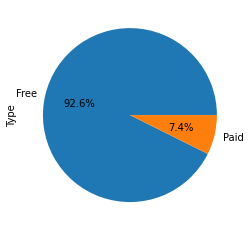

In [19]:
data['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')

##### What is the app with the most installations ?

In [25]:
data['Installs'].max()

1000000000

In [32]:
data[data['Installs'] == 1000000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Datetime(Last Updated)
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device,2018-08-03
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,2018-08-01
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,2018-08-03
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,2018-08-01
340,Gmail,COMMUNICATION,4.3,4604324,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device,2018-08-02
341,Hangouts,COMMUNICATION,4.0,3419249,Varies with device,1000000000,Free,0.0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device,2018-07-21
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,2018-08-03
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,2018-08-01
386,Hangouts,COMMUNICATION,4.0,3419433,Varies with device,1000000000,Free,0.0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device,2018-07-21
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,2018-08-03


<AxesSubplot:>

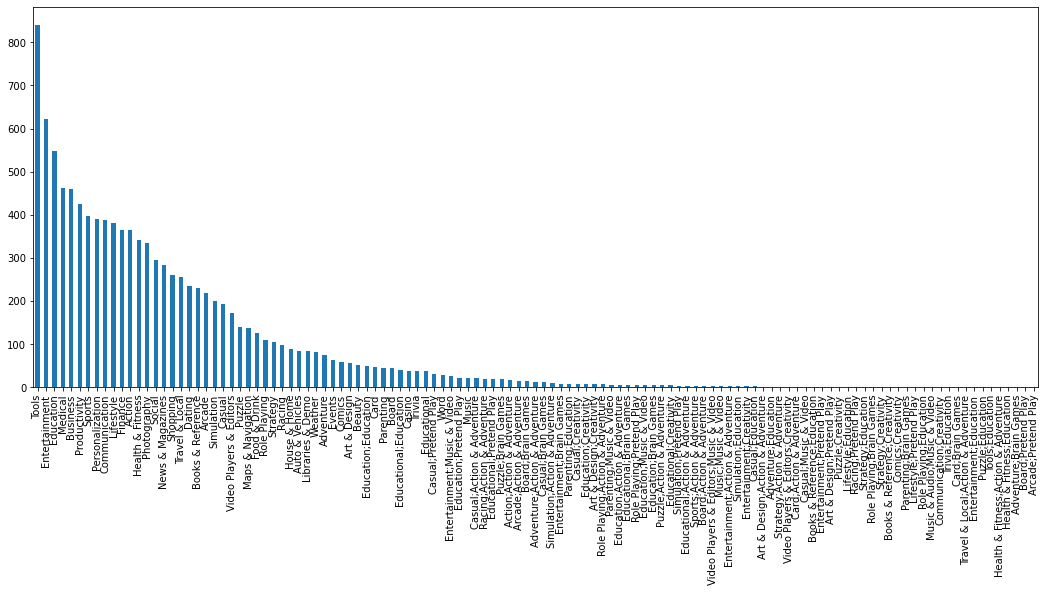

In [37]:
plt.figure(figsize=(18,7))
data['Genres'].value_counts().plot(kind='bar')

##### Display most reviewed apps

<AxesSubplot:xlabel='Reviews', ylabel='App'>

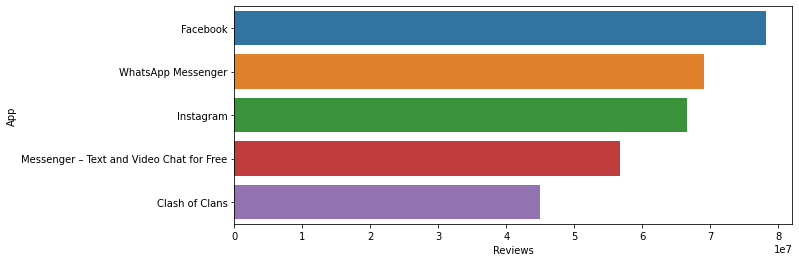

In [48]:
plt.figure(figsize=(10,4))
top_ten = data.sort_values(by='Reviews', ascending=False).head(15)
sns.barplot(x='Reviews', y='App', data=top_ten)

##### Does price affect installations ?

<AxesSubplot:xlabel='Price', ylabel='Installs'>

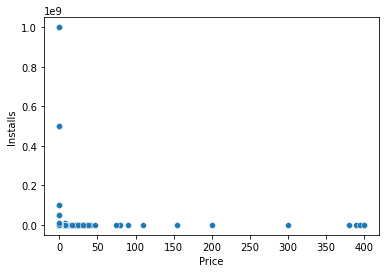

In [49]:
sns.scatterplot(x='Price', y='Installs', data=data)

##### All Social media apps

In [52]:
data['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [56]:
social_apps = len(data[data['Genres'].str.contains('social', case=False)])
print(f'There\'s {social_apps} social media apps on our dataset.')

There's 295 social media apps on our dataset


##### Which apps between free & paid have the most reviews ?

In [61]:
data.groupby(['Type']).mean()

,Rating,Reviews,Installs,Price
Type,,,,
Free,4.187214,478992.652711,1.670245e+07,0.000000
Paid,4.252807,11716.737767,9.147437e+04,13.968883
